In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df=pd.read_csv('owid-covid-data.csv')

In [112]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [113]:
# df.drop("iso_code",axis=1,inplace=True)
# df.head()

wanted_columns=["location","total_cases",'people_vaccinated','date','country',"total_vaccinations", "people_fully_vaccinated", "new_vaccinations",]
wanted_row=["india"]
count=[]
for i in df.columns:
    if i in wanted_columns:
        print(i)
    else :
        del df[i]
df.head()


location
date
total_cases
total_vaccinations
people_vaccinated
people_fully_vaccinated
new_vaccinations


,location,date,total_cases,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,Afghanistan,2/24/2020,5.0,NaN,NaN,NaN,NaN
1,Afghanistan,2/25/2020,5.0,NaN,NaN,NaN,NaN
2,Afghanistan,2/26/2020,5.0,NaN,NaN,NaN,NaN
3,Afghanistan,2/27/2020,5.0,NaN,NaN,NaN,NaN
4,Afghanistan,2/28/2020,5.0,NaN,NaN,NaN,NaN


In [114]:
# Convert Month into Datetime
df['date']=pd.to_datetime(df['date'])

In [115]:
df.head()
df.set_index('date',inplace=True)
df.head()

,location,total_cases,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
date,,,,,,
2020-02-24,Afghanistan,5.0,NaN,NaN,NaN,NaN
2020-02-25,Afghanistan,5.0,NaN,NaN,NaN,NaN
2020-02-26,Afghanistan,5.0,NaN,NaN,NaN,NaN
2020-02-27,Afghanistan,5.0,NaN,NaN,NaN,NaN
2020-02-28,Afghanistan,5.0,NaN,NaN,NaN,NaN


### Visualize

<AxesSubplot:xlabel='date'>

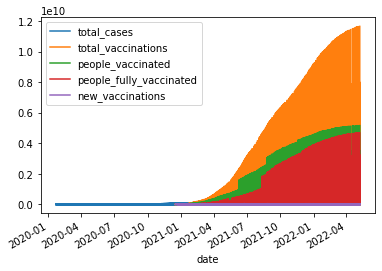

In [116]:
df.plot()

### Testing For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['total_cases','people_vaccinated','total_vaccinations','people_fully_vaccinated','new_vaccinations'])